In [1]:
#데이터 파일 확인
import pandas as pd
import numpy as np

data = pd.read_csv('공공보건 의료기관 현황_20161231.csv', index_col = 0, encoding = 'cp949', engine = 'python')
data.head()

,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
연번,,,,,,,,,,,,,,
1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN


In [2]:
#주소 정리하기
addr = pd.DataFrame(data['주소'].apply(lambda v : v.split()[0 : 2]).tolist(), columns = ('시도', '구군'))
addr.head()

,시도,구군
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시


In [3]:
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '창원시', '경상남도', '경상북도', '경산시', '경북',
       '인천광역시', '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시',
       '전라북도', '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도',
       '울산광역시', '전북', '천안시', '충청북도'], dtype=object)

In [4]:
#주소 체계에 맞지 않게 표현된 내용 찾아서 수정

#'시'가 아닌 데이터 찾아서 수정
addr[addr['시도'] == '창원시']

,시도,구군
27,창원시,의창구
31,창원시,마산합포구3.15대로


In [5]:
addr.iloc[27] = ['경상남도', '창원시']
addr.iloc[31] = ['경상남도', '창원시']
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '경상남도', '경상북도', '경산시', '경북', '인천광역시',
       '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도',
       '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도', '울산광역시',
       '전북', '천안시', '충청북도'], dtype=object)

In [6]:
addr[addr['시도'] == '경산시']

,시도,구군
47,경산시,경안로


In [7]:
addr.iloc[47] = ['경상북도', '경산시']

In [8]:
addr[addr['시도'] == '천안시']

,시도,구군
209,천안시,동남구
210,천안시,동남구


In [9]:
addr.iloc[209] = ['충청남도', '천안시']
addr.iloc[210] = ['충청남도', '천안시']

In [10]:
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '경상남도', '경상북도', '경북', '인천광역시', '대구광역시',
       '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충북',
       '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도', '울산광역시', '전북',
       '충청북도'], dtype=object)

In [11]:
#행정구역 주소 체계에 맞지 않는 데이터 수정
addr_aliases = {'경기' : '경기도', '경남' : '경상남도', '경북' : '경상북도', '충북' : '충청북도',
                '서울시' : '서울특별시', '부산특별시' : '부산광역시', '대전시' : '대전광역시',
                '충남' : '충청남도', '전남' : '전라남도', '전북' : '전라북도'}
addr['시도'] = addr['시도'].apply(lambda s : addr_aliases.get(s, s))

addr['시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '인천광역시', '대구광역시', '전라남도', '대전광역시',
       '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충청북도', '서울특별시', '충청남도',
       '울산광역시'], dtype=object)

In [12]:
#구군 열 수정
addr['구군'].unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '아란13길', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군',
       '강동구', '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군',
       '양구군', '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구',
       '노원구', '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군',
       '연제구', '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구',
       '성동구', '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군',
       '진도군', '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시',
       '남원시', '군산시', '고창군', '진안군', '제주시', '서귀포시', '천안시', '보령시', '서산시',
       '서천

In [13]:
addr[addr['구군'] == '아란13길']

,시도,구군
75,제주특별자치도,아란13길


In [14]:
addr.iloc[75] = ['제주특별자치도', '제주시']

In [15]:
#행정구역별 공공보건 의료기관의 수 구하기
addr['시도구군'] = addr.apply(lambda r : r['시도'] + ' ' + r['구군'], axis = 1)
addr.head()

,시도,구군,시도구군
0,강원도,춘천시,강원도 춘천시
1,강원도,삼척시,강원도 삼척시
2,강원도,영월군,강원도 영월군
3,강원도,원주시,강원도 원주시
4,강원도,강릉시,강원도 강릉시


In [16]:
addr['count'] = 0
addr_group = addr.groupby(['시도', '구군', '시도구군'], as_index = False).count()
addr_group.head()

,시도,구군,시도구군,count
0,강원도,강릉시,강원도 강릉시,4
1,강원도,동해시,강원도 동해시,1
2,강원도,삼척시,강원도 삼척시,1
3,강원도,속초시,강원도 속초시,1
4,강원도,양구군,강원도 양구군,1


In [17]:
#index를 시도구군으로 변경
addr_group = addr_group.set_index('시도구군')
addr_group.head()

,시도,구군,count
시도구군,,,
강원도 강릉시,강원도,강릉시,4
강원도 동해시,강원도,동해시,1
강원도 삼척시,강원도,삼척시,1
강원도 속초시,강원도,속초시,1
강원도 양구군,강원도,양구군,1


In [18]:
#행정구역별 인구 수 데이터 준비하기
population = pd.read_excel('행정구역 시군구 별 성별 인구수.xlsx')
population.head()

,행정구역(시군구)별,행정구역(시군구)별.1,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,서울특별시,소계,9422710,4563512,4859198
1,서울특별시,종로구,140891,68079,72812
2,서울특별시,중구,121250,58806,62444
3,서울특별시,용산구,217611,104580,113031
4,서울특별시,성동구,279980,136059,143921


In [19]:
population = population.rename(columns = {'행정구역(시군구)별' : '시도',
                                          '행정구역(시군구)별.1' : '구군'})
population.head()

,시도,구군,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,서울특별시,소계,9422710,4563512,4859198
1,서울특별시,종로구,140891,68079,72812
2,서울특별시,중구,121250,58806,62444
3,서울특별시,용산구,217611,104580,113031
4,서울특별시,성동구,279980,136059,143921


In [20]:
for element in range(0, len(population)) :
    population['시도'][element] = population['시도'][element].strip()
    population['구군'][element] = population['구군'][element].strip()

population['시도구군'] = population.apply(lambda r : r['시도'] + ' ' + r['구군'], axis = 1)

population = population[population.구군 != '소계']
population = population.set_index('시도구군')
population.head()

/var/folders/y6/6gd___pj6_5gqssnbc9jxhlw0000gn/T/ipykernel_3026/2325533814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['시도'][element] = population['시도'][element].strip()
/var/folders/y6/6gd___pj6_5gqssnbc9jxhlw0000gn/T/ipykernel_3026/2325533814.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['구군'][element] = population['구군'][element].strip()


,시도,구군,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도구군,,,,,
서울특별시 종로구,서울특별시,종로구,140891,68079,72812
서울특별시 중구,서울특별시,중구,121250,58806,62444
서울특별시 용산구,서울특별시,용산구,217611,104580,113031
서울특별시 성동구,서울특별시,성동구,279980,136059,143921
서울특별시 광진구,서울특별시,광진구,336558,162071,174487


In [21]:
#addr_group과 population 병합
addr_population_merge = pd.merge(addr_group, population, left_index = True, right_index = True)
addr_population_merge.head()

,시도_x,구군_x,count,시도_y,구군_y,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도구군,,,,,,,,
강원도 강릉시,강원도,강릉시,4,강원도,강릉시,210630,104403,106227
강원도 동해시,강원도,동해시,1,강원도,동해시,89150,45303,43847
강원도 삼척시,강원도,삼척시,1,강원도,삼척시,63444,32193,31251
강원도 속초시,강원도,속초시,1,강원도,속초시,82499,40867,41632
강원도 양구군,강원도,양구군,1,강원도,양구군,21348,11218,10130


In [22]:
local_population = addr_population_merge[['시도_x', '구군_x', 'count', '총인구수 (명)']]
local_population.head()

,시도_x,구군_x,count,총인구수 (명)
시도구군,,,,
강원도 강릉시,강원도,강릉시,4,210630
강원도 동해시,강원도,동해시,1,89150
강원도 삼척시,강원도,삼척시,1,63444
강원도 속초시,강원도,속초시,1,82499
강원도 양구군,강원도,양구군,1,21348


In [23]:
local_population = local_population.rename(columns = {'시도_x' : '시도', '구군_x' : '구군',
                                                      '총인구수 (명)' : '인구수'})
count = local_population['count']
local_population['ratio'] = count.div(local_population['인구수'], axis = 0) * 10000
local_population.head()

,시도,구군,count,인구수,ratio
시도구군,,,,,
강원도 강릉시,강원도,강릉시,4,210630,0.189906
강원도 동해시,강원도,동해시,1,89150,0.112170
강원도 삼척시,강원도,삼척시,1,63444,0.157619
강원도 속초시,강원도,속초시,1,82499,0.121214
강원도 양구군,강원도,양구군,1,21348,0.468428


In [24]:
#행정구역별 공공보건의료기관 수에 대한 바 차트 그리기
from matplotlib import pyplot as plt
from matplotlib import rcParams, style
style.use('ggplot')
from matplotlib import font_manager, rc

rc('font', family='AppleGothic')

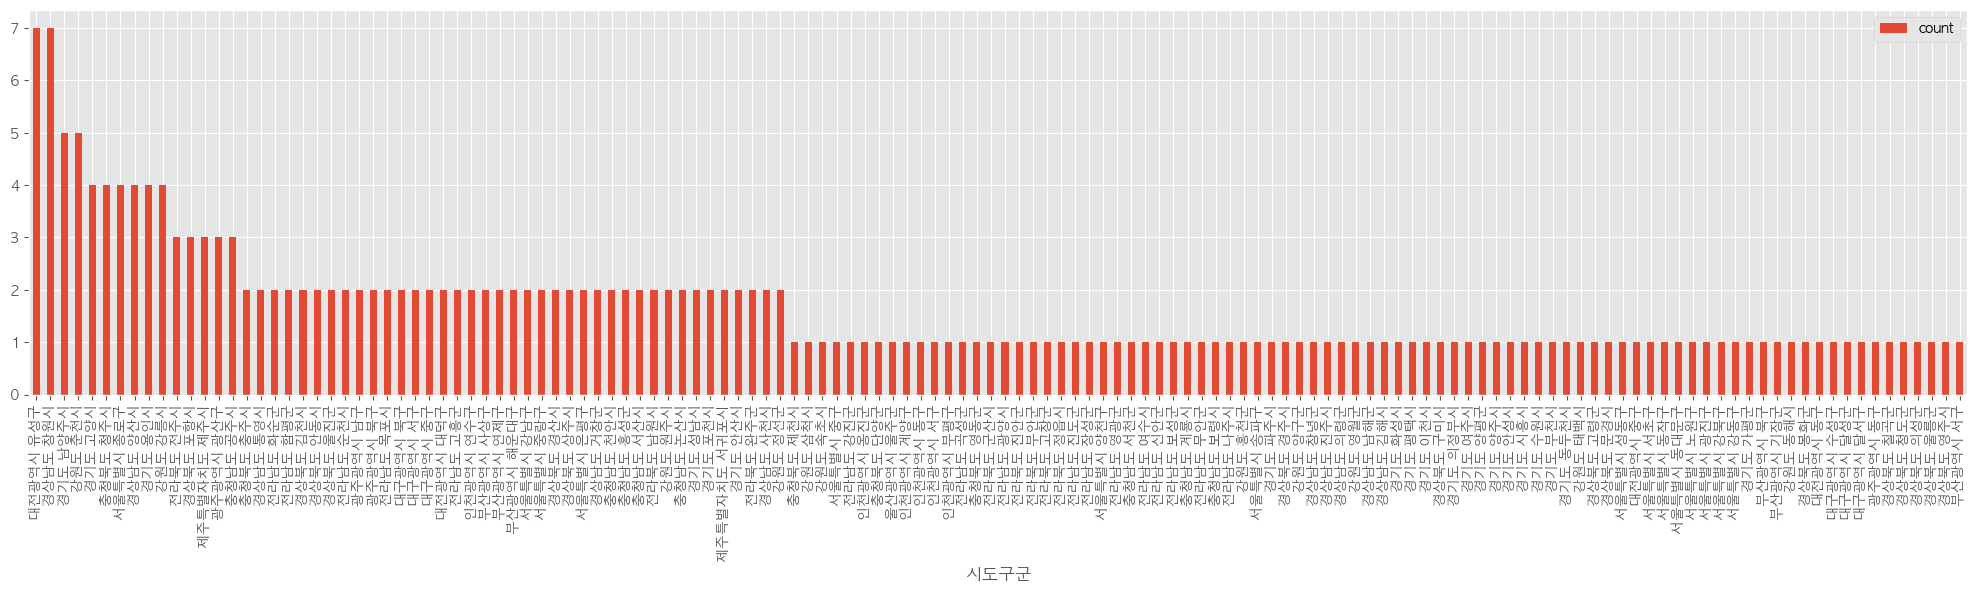

In [25]:
MC_count = local_population[['count']]
#'count' 칼럼을 기준으로 내림차순
MC_count = MC_count.sort_values('count', ascending = False)
plt.rcParams['figure.figsize'] = (25, 5)
MC_count.plot(kind = 'bar', rot = 90)
plt.show()

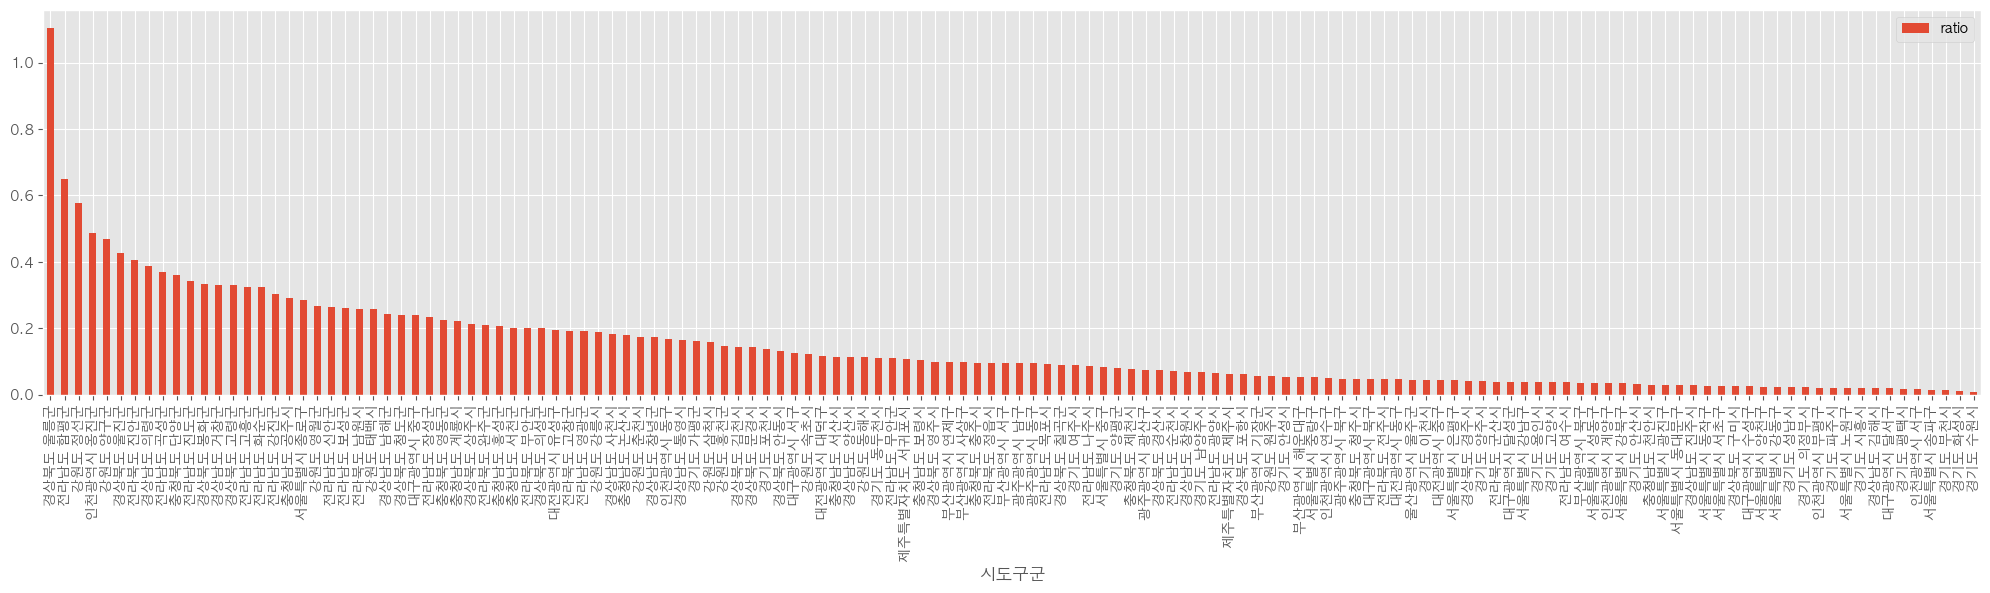

In [26]:
#행정구역별 인구수 대비 공공보건의료기관 비율에 대한 바 차트 그리기
MC_ratio = local_population[['ratio']]
#'ratio' 칼럼을 기준으로 내림차순
MC_ratio = MC_ratio.sort_values('ratio', ascending = False)
plt.rcParams['figure.figsize'] = (25, 5)
MC_ratio.plot(kind = 'bar', rot = 90)
plt.show()